# Tugas Morfologi Pengukuran Berbasis Citra
 13519008 - Ronggur Mahendra

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

In [14]:
colour =  cv.imread("./coin.png", cv.IMREAD_COLOR)
img = cv.imread("./coin.png", 0)
print(img.shape)

# plt.figure()
# plt.imshow(img,'gray',vmin=0,vmax=255)
# plt.show()


(333, 410)


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1c36691fe50>)

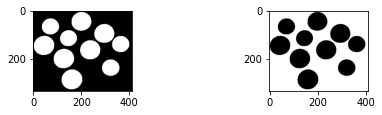

In [15]:
blur = cv.GaussianBlur(img,(5,5),0)
ret,thresh = cv.threshold(blur,90,255,cv.THRESH_BINARY)
ret,thresh_inv = cv.threshold(blur,90,255,cv.THRESH_BINARY_INV)
plt.subplot(2,3,1),plt.imshow(thresh,'gray',vmin=0,vmax=255)
plt.subplot(2,3,3),plt.imshow(thresh_inv,'gray',vmin=0,vmax=255)

In [16]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3,3))
erosion = cv.erode(thresh,kernel,iterations = 3)
dilation = cv.dilate(thresh,kernel,iterations = 3)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)
gradient = cv.morphologyEx(thresh, cv.MORPH_GRADIENT, kernel)
print(kernel)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1c366aba790>)

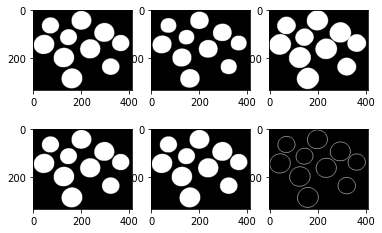

In [17]:
plt.subplot(2,3,1),plt.imshow(thresh,'gray',vmin=0,vmax=255)
plt.subplot(2,3,2),plt.imshow(erosion,'gray',vmin=0,vmax=255)
plt.subplot(2,3,3),plt.imshow(dilation,'gray',vmin=0,vmax=255)
plt.subplot(2,3,4),plt.imshow(opening,'gray',vmin=0,vmax=255)
plt.subplot(2,3,5),plt.imshow(closing,'gray',vmin=0,vmax=255)
plt.subplot(2,3,6),plt.imshow(gradient,'gray',vmin=0,vmax=255)

Region Filling

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1c364a46f40>)

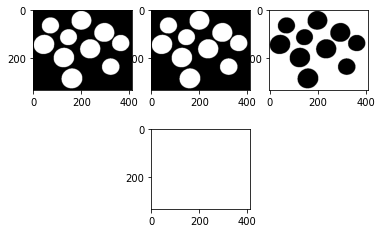

In [18]:
thresh_floodfill = thresh.copy()

h, w = thresh.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)


cv.floodFill(thresh_floodfill, mask, (0,0), 0)
thresh_floodfill_inv = cv.bitwise_not(thresh_floodfill)
thresh_out = thresh_floodfill | thresh_floodfill_inv

plt.subplot(2,3,1),plt.imshow(thresh,'gray',vmin=0,vmax=255)
plt.subplot(2,3,2),plt.imshow(thresh_floodfill,'gray',vmin=0,vmax=255)
plt.subplot(2,3,3),plt.imshow(thresh_floodfill_inv,'gray',vmin=0,vmax=255)
plt.subplot(2,3,5),plt.imshow(thresh_out,'gray',vmin=0,vmax=255)


Contour

coins in the image :  10


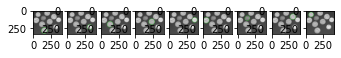

In [19]:
(cnt, hierarchy) = cv.findContours(gradient.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
#rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print("coins in the image : ", len(cnt))
colourTemp = []
for i in range(0,len(cnt)-1):
    colourTemp = colour.copy()
    cv.drawContours(colourTemp, cnt[i], -1, (0, 255, 0), 2)
    plt.subplot(1,len(cnt),i+1),plt.imshow(colourTemp)

Didapatkan bahwa coin yang diinginkan ada pada index 0 cnt

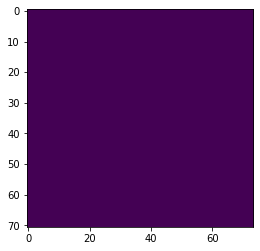

In [20]:
mask = np.zeros_like(img)

out = np.zeros_like(img) # Extract out the object and place into output image
out[mask == 255] = img[mask == 255]
cv.drawContours(mask, cnt, 1, 255, -1)

(y, x) = np.where(mask == 255)
(topy, topx) = (np.min(y), np.min(x))
(bottomy, bottomx) = (np.max(y), np.max(x))
out = out[topy:bottomy+1, topx:bottomx+1]
# Show the output image
plt.imshow(out)

In [22]:
print(out.shape)

(71, 74)
